<h3> Description </h3>

1. Survived: Outcome of survival (0 = No; 1 = Yes)

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import re #Regex
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [34]:
data = pd.read_csv('data/test-no-label.csv')

In [35]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
1,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
2,874,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
3,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
4,876,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


In [36]:
#See the number of rows and number of columns of data
data.shape

(20, 11)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  20 non-null     int64  
 1   Pclass       20 non-null     int64  
 2   Name         20 non-null     object 
 3   Sex          20 non-null     object 
 4   Age          18 non-null     float64
 5   SibSp        20 non-null     int64  
 6   Parch        20 non-null     int64  
 7   Ticket       20 non-null     object 
 8   Fare         20 non-null     float64
 9   Cabin        5 non-null      object 
 10  Embarked     20 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.8+ KB


In [38]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,20.00000,20.000000,18.000000,20.000000,20.000000,20.00000
mean,881.50000,2.300000,30.055556,0.150000,0.500000,20.09312
std,5.91608,0.864505,11.037222,0.366348,1.192079,19.18680
min,872.00000,1.000000,15.000000,0.000000,0.000000,5.00000
25%,876.75000,1.750000,22.750000,0.000000,0.000000,7.89580
50%,881.50000,3.000000,27.500000,0.000000,0.000000,10.50835
75%,886.25000,3.000000,33.000000,0.000000,0.250000,26.78125
max,891.00000,3.000000,56.000000,1.000000,5.000000,83.15830


In [39]:
#Drop duplicate value
data=data.drop_duplicates()

In [40]:
#See changes in the number of rows and columns after the duplicate value is deleted
data.shape

(20, 11)

In [41]:
#Check Data Type
data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [42]:
#Check the missing value
data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             2
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          15
Embarked        0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


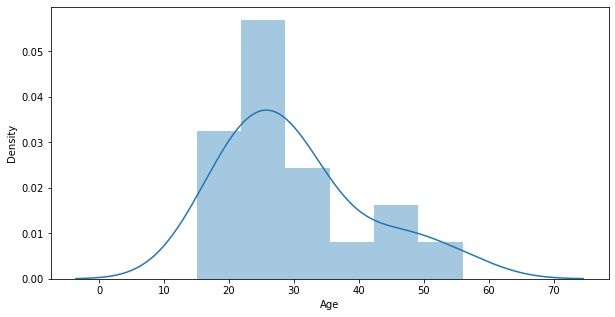

In [43]:
#Look at the distribution of the Age variable with histogram and density plot

plt.figure(figsize=(10, 5))
sns.distplot(data["Age"])
plt.show()

In [44]:
data = pd.get_dummies(data, columns=['Cabin'], drop_first=True)

data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_B51 B53 B55,Cabin_C148,Cabin_C50,Cabin_D35
0,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,0,0,0,1
1,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S,1,0,0,0
2,874,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,S,0,0,0,0
3,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C,0,0,0,0
4,876,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,0,0,0,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        20 non-null     int64  
 1   Pclass             20 non-null     int64  
 2   Name               20 non-null     object 
 3   Sex                20 non-null     object 
 4   Age                18 non-null     float64
 5   SibSp              20 non-null     int64  
 6   Parch              20 non-null     int64  
 7   Ticket             20 non-null     object 
 8   Fare               20 non-null     float64
 9   Embarked           20 non-null     object 
 10  Cabin_B51 B53 B55  20 non-null     uint8  
 11  Cabin_C148         20 non-null     uint8  
 12  Cabin_C50          20 non-null     uint8  
 13  Cabin_D35          20 non-null     uint8  
dtypes: float64(2), int64(4), object(4), uint8(4)
memory usage: 1.8+ KB


In [46]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_B51 B53 B55,Cabin_C148,Cabin_C50,Cabin_D35,Sex_male
0,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,S,0,0,0,1,0
1,873,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,S,1,0,0,0,1
2,874,3,"Vander Cruyssen, Mr. Victor",47.0,0,0,345765,9.0000,S,0,0,0,0,1
3,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,1,0,P/PP 3381,24.0000,C,0,0,0,0,0
4,876,3,"Najib, Miss. Adele Kiamie ""Jane""",15.0,0,0,2667,7.2250,C,0,0,0,0,0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


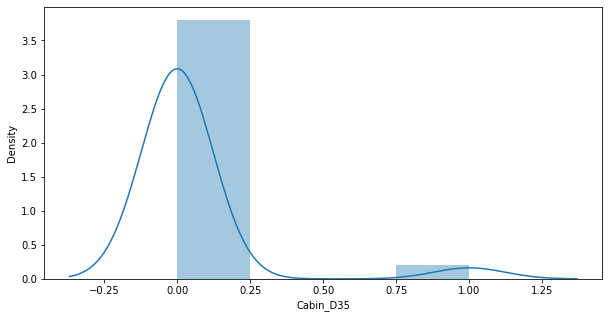

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(data["Cabin_D35"])
plt.show()

In [50]:
#Because the ph variable has poitive skewness , therefore the missing value is imputed with the mode
fill=data["Age"].median()
data["Age"]=data["Age"].fillna(fill)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        20 non-null     int64  
 1   Pclass             20 non-null     int64  
 2   Name               20 non-null     object 
 3   Age                20 non-null     float64
 4   SibSp              20 non-null     int64  
 5   Parch              20 non-null     int64  
 6   Ticket             20 non-null     object 
 7   Fare               20 non-null     float64
 8   Embarked           20 non-null     object 
 9   Cabin_B51 B53 B55  20 non-null     uint8  
 10  Cabin_C148         20 non-null     uint8  
 11  Cabin_C50          20 non-null     uint8  
 12  Cabin_D35          20 non-null     uint8  
 13  Sex_male           20 non-null     uint8  
dtypes: float64(2), int64(4), object(3), uint8(5)
memory usage: 1.7+ KB


In [52]:
#Check missing value after imputation
data.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Cabin_B51 B53 B55    0
Cabin_C148           0
Cabin_C50            0
Cabin_D35            0
Sex_male             0
dtype: int64

Outlier Detection

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


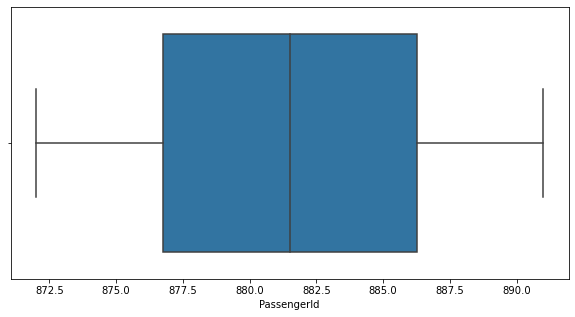

In [53]:
#Check Outlier on the ph variable
plt.figure(figsize=(10,5))
sns.boxplot(data["PassengerId"])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


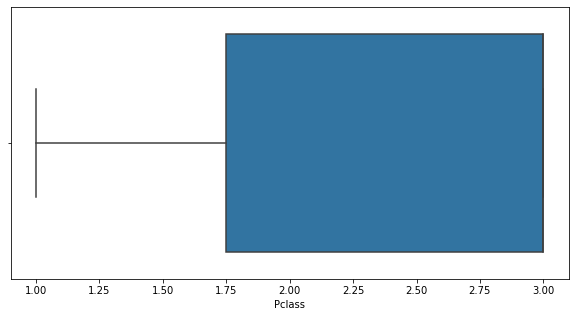

In [54]:
#Check Outlier on the Pclass variable
plt.figure(figsize=(10,5))
sns.boxplot(data["Pclass"])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


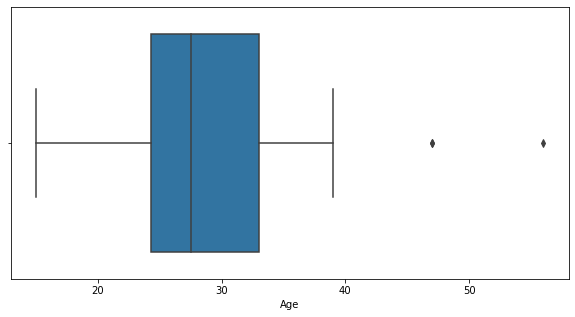

In [55]:
#Check Outlier on the Age variable
plt.figure(figsize=(10,5))
sns.boxplot(data["Age"])
plt.show()

In [56]:
Q1=data["Age"].quantile(0.25)
Q3=data["Age"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["Age"]>upper_range),:]


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_B51 B53 B55,Cabin_C148,Cabin_C50,Cabin_D35,Sex_male
0,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,S,0,0,0,1,0
2,874,3,"Vander Cruyssen, Mr. Victor",47.0,0,0,345765,9.0000,S,0,0,0,0,1
8,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C,0,0,1,0,0


In [57]:
data.loc[(data["Age"]>upper_range),"Age"]=upper_range

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


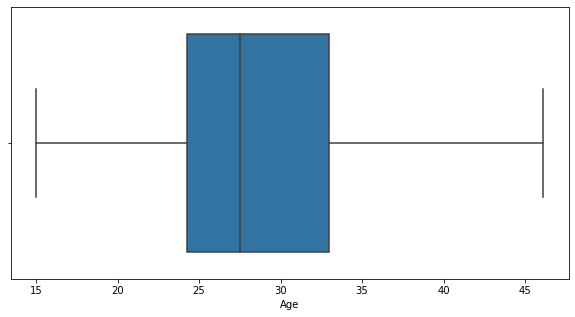

In [58]:
#Check Outlier on the Age variable
plt.figure(figsize=(10,5))
sns.boxplot(data["Age"])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


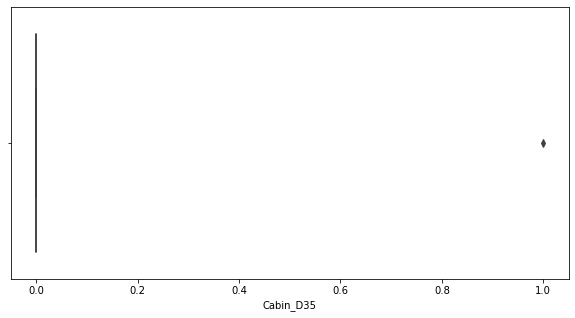

In [59]:
#Check Outlier on the Cabin_D35 variable
plt.figure(figsize=(10,5))
sns.boxplot(data["Cabin_D35"])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


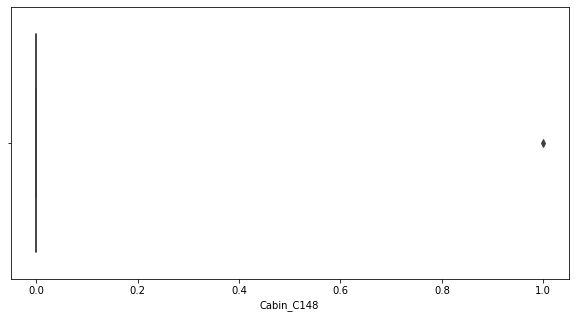

In [60]:
#Check Outlier on the Cabin_D35 variable
plt.figure(figsize=(10,5))
sns.boxplot(data["Cabin_C148"])
plt.show()

In [50]:
data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_B51 B53 B55,Cabin_C148,Cabin_C50,Cabin_D35,Sex_male
0,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",46.125000,1,1,11751,52.5542,S,0,0,0,1,0
1,873,1,"Carlsson, Mr. Frans Olof",33.000000,0,0,695,5.0000,S,1,0,0,0,1
2,874,3,"Vander Cruyssen, Mr. Victor",46.125000,0,0,345765,9.0000,S,0,0,0,0,1
3,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.000000,1,0,P/PP 3381,24.0000,C,0,0,0,0,0
4,876,3,"Najib, Miss. Adele Kiamie ""Jane""",15.000000,0,0,2667,7.2250,C,0,0,0,0,0
5,877,3,"Gustafsson, Mr. Alfred Ossian",20.000000,0,0,7534,9.8458,S,0,0,0,0,1
6,878,3,"Petroff, Mr. Nedelio",19.000000,0,0,349212,7.8958,S,0,0,0,0,1
7,879,3,"Laleff, Mr. Kristo",30.055556,0,0,349217,7.8958,S,0,0,0,0,1
8,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",46.125000,0,1,11767,83.1583,C,0,0,1,0,0
9,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",25.000000,0,1,230433,26.0000,S,0,0,0,0,0


In [69]:
# Select columns and view head
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,0,52.5542,46.125,1,1
1,1,5.0000,33.000,1,0
2,1,9.0000,46.125,3,0
3,0,24.0000,28.000,2,1
4,0,7.2250,15.000,3,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  20 non-null     uint8  
 1   Fare      20 non-null     float64
 2   Age       20 non-null     float64
 3   Pclass    20 non-null     int64  
 4   SibSp     20 non-null     int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 820.0 bytes
